In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
# Load dataset
tweet_df = pd.read_csv("data_traintest.csv", encoding ='unicode_escape')
tweet_df.head(5)

,waktu,tweets,polarity
0,2022-09-18 06:09:26,rangkum aktivitas kader isu kembang kait parta...,1
1,2022-09-18 04:17:28,tunda milu periode cawapres nambah tahun dan l...,1
2,2022-09-17 17:31:57,purnawirawan jendral mantan presiden uang pasu...,0
3,2022-09-14 07:45:49,ahok peras rakyat iya pelan periode ma,1
4,2022-09-14 02:50:19,niat tunda milu,1


In [3]:
#definisi dataframe
df = pd.DataFrame(tweet_df[['waktu', 'tweets', 'polarity']])
df.head()

,waktu,tweets,polarity
0,2022-09-18 06:09:26,rangkum aktivitas kader isu kembang kait parta...,1
1,2022-09-18 04:17:28,tunda milu periode cawapres nambah tahun dan l...,1
2,2022-09-17 17:31:57,purnawirawan jendral mantan presiden uang pasu...,0
3,2022-09-14 07:45:49,ahok peras rakyat iya pelan periode ma,1
4,2022-09-14 02:50:19,niat tunda milu,1


In [4]:
df['polarity'].value_counts()

0    758
1    667
Name: polarity, dtype: int64

In [5]:
#balancing dataset
data1 = df[df['polarity']==0].sample(712,replace=True)
data2 = df[df['polarity']==1].sample(712,replace=True)
df=pd.concat([data1, data2])

df.shape
df['polarity'].value_counts(normalize=True)

0    0.5
1    0.5
Name: polarity, dtype: float64

In [6]:
input_dim = 10000 #Ukuran max dimensi kata
max_tweets_length = 200 #Batas max panjang sequence kata
texts = pd.concat([df['tweets']], axis = 0).astype("str")
tokenizer = Tokenizer(num_words=input_dim)
tokenizer.fit_on_texts(texts)

X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=max_tweets_length)
X
#X.shape

array([[   0,    0,    0, ...,  571,  572,  435],
       [   0,    0,    0, ...,    2,    1,    6],
       [   0,    0,    0, ...,   12,    2, 1245],
       ...,
       [   0,    0,    0, ...,    9,  732,  820],
       [   0,    0,    0, ..., 1194,    2,    1],
       [   0,    0,    0, ...,    1,   61,  158]])

In [7]:
X = pad_sequences(X, maxlen=max_tweets_length)
X.shape

(1424, 200)

In [8]:
Y = df['polarity']
Y.shape

(1424,)

In [9]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size = 0.1, random_state = 42)
print("Training data size : ", X_train.shape, Y_train.shape)
print("Test data size : ", X_test.shape, Y_test.shape)

Training data size :  (1281, 200) (1281,)
Test data size :  (143, 200) (143,)


In [10]:
output_dim = 32 #Dimensi embedding dari output
model = Sequential()
model.add(Embedding(input_dim, output_dim, input_length=X.shape[1])) #Input layer
model.add(Dropout(0.5)) #Dropout layer
model.add(LSTM(100)) #LSTM layer
model.add(Dense(1, activation='sigmoid')) #Output layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print (model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 dropout (Dropout)           (None, 200, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
16/16 [==============================] - 8s 359ms/step - loss: 0.6926 - accuracy: 0.4980 - val_loss: 0.6903 - val_accuracy: 0.6887
Epoch 2/20
16/16 [==============================] - 5s 341ms/step - loss: 0.6835 - accuracy: 0.7070 - val_loss: 0.6784 - val_accuracy: 0.6109
Epoch 3/20
16/16 [==============================] - 6s 347ms/step - loss: 0.6394 - accuracy: 0.7207 - val_loss: 0.6279 - val_accuracy: 0.7082
Epoch 4/20
16/16 [==============================] - 6s 352ms/step - loss: 0.5469 - accuracy: 0.7773 - val_loss: 0.6172 - val_accuracy: 0.6304
Epoch 5/20
16/16 [==============================] - 6s 359ms/step - loss: 0.4743 - accuracy: 0.7949 - val_loss: 0.5137 - val_accuracy: 0.7665
Epoch 6/20
16/16 [==============================] - 6s 357ms/step - loss: 0.3982 - accuracy: 0.8818 - val_loss: 0.4564 - val_accuracy: 0.8171
Epoch 7/20
16/16 [==============================] - 6s 357ms/step - loss: 0.3280 - accuracy: 0.9229 - val_loss: 0.4092 - val_accuracy: 0.8444
Epoch 

In [12]:
prediction = model.predict(X_test)
Y_pred = (prediction > 0.5)
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print("Accuracy of the model : ", accuracy_score(Y_pred, Y_test))
print('F1-score: ', f1_score(Y_pred, Y_test))
print('Confusion matrix:')
confusion_matrix(Y_test,Y_pred)

5/5 [==============================] - 1s 63ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        71
           1       0.92      0.92      0.92        72

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

Accuracy of the model :  0.916083916083916
F1-score:  0.9166666666666666
Confusion matrix:


array([[65,  6],
       [ 6, 66]], dtype=int64)

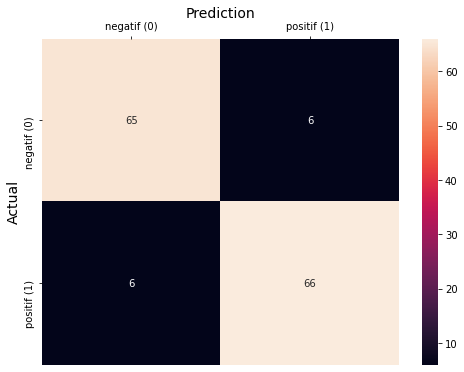

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = Y_test, y_pred = Y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['negatif (0)', 'positif (1)'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['negatif (0)', 'positif (1)'])
plt.show()

In [14]:
model

In [15]:
# Load dataset
tweet_df = pd.read_csv("data_klasifikasi.csv", encoding ='unicode_escape')
tweet_df.head(5)

,waktu,tweets
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu
2,2022-12-23 02:45:22,tahap tunda milu
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda
4,2022-12-23 02:43:29,tunda


In [16]:
#definisi dataframe
df = pd.DataFrame(tweet_df[['waktu', 'tweets']])
df.head()

,waktu,tweets
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu
2,2022-12-23 02:45:22,tahap tunda milu
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda
4,2022-12-23 02:43:29,tunda


In [17]:
def TestModel (data):
    input_dim = 1000 #Ukuran max dimensi kata
    max_tweets_length = 200 #Batas max panjang sequence kata
    texts = pd.concat([tweet_df['tweets']], axis = 0).astype("str")
    tokenizer = Tokenizer(num_words=input_dim)
    tokenizer.fit_on_texts(texts) 
        
    X_tok = tokenizer.texts_to_sequences(texts)
    X_pad = pad_sequences(X_tok, maxlen=max_tweets_length)
    std_pred = model.predict(X_pad)
    pred_labels = []
    for i in std_pred:
        if i >= 0.5:
            pred_labels.append(1)
        else:
            pred_labels.append(0)
    
    df = pd.DataFrame(data = {'Waktu' : tweet_df['waktu'],'Tweets' : texts,  'Sentimen' : pred_labels})
    return df

TestModel(texts)

21/21 [==============================] - 1s 67ms/step


,Waktu,Tweets,Sentimen
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...,1
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu,0
2,2022-12-23 02:45:22,tahap tunda milu,0
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda,0
4,2022-12-23 02:43:29,tunda,1
...,...,...,...
645,2022-12-13 23:19:42,tuju cerita tunda milu wacana periode,0
646,2022-12-13 22:52:45,negara nenek moyang kudeta konstitusi undang b...,1
647,2022-12-13 22:23:28,cebong ngotot tunda milu periode iya iya kasih...,0
648,2022-12-13 22:04:54,harus milu tundatetapi tiadakansoal dpn matara...,0


In [18]:
#TestModel(texts).to_csv('Hasil_Test/Analisis_LSTM.csv',encoding='utf8', index=False)

21/21 [==============================] - 1s 65ms/step


In [19]:
# Load dataset
tweet_df = pd.read_csv("Hasil_Test/Analisis_LSTM.csv", encoding ='utf8')
tweet_df.head(5)

,Waktu,Tweets,Sentimen
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...,1
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu,0
2,2022-12-23 02:45:22,tahap tunda milu,0
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda,0
4,2022-12-23 02:43:29,tunda,1


In [20]:
tweet_df['Sentimen'].value_counts()

1    344
0    306
Name: Sentimen, dtype: int64

In [21]:
def polarity_encode(x):
    if(x == 1):
        return 'Positif'
    if(x == 0):
        return 'Negatif'
tweet_df.Sentimen = tweet_df.Sentimen.apply(polarity_encode)
#tweet_df.head()

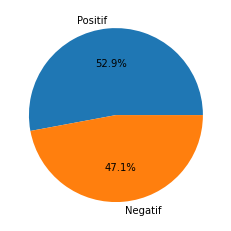

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (4, 4))
sizes = [count for count in tweet_df['Sentimen'].value_counts()]
labels = list(tweet_df['Sentimen'].value_counts().index)
explode = (0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
plt.show()
plt.savefig("gambar/klasifikasi_lstm.png")